<a href="https://colab.research.google.com/github/Aishwarya240/AIES_LAB/blob/main/Ex_02_AIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate

In [ ]:
data= pd.read_csv("https://data.cityofnewyork.us/resource/vx8i-nprf.csv")

In [ ]:
print(data.columns.values)

['exam_no' 'list_no' 'first_name' 'mi' 'last_name' 'adj_fa'
 'list_title_code' 'list_title_desc' 'group_no' 'list_agency_code'
 'list_agency_desc' 'list_div_code' 'published_date' 'established_date'
 'anniversary_date' 'extension_date' 'veteran_credit' 'parent_lgy_credit'
 'sibling_lgy_credit' 'residency_credit']


In [ ]:
# Preprocess
data = data[['adj_fa', 'list_title_desc', 'list_agency_desc', 'veteran_credit', 'parent_lgy_credit', 'sibling_lgy_credit', 'residency_credit']]
data = pd.get_dummies(data, drop_first=True)
#data = pd.get_dummies(data)

In [ ]:
print(data.columns.values)

['adj_fa' 'list_title_desc_ADMINISTRATIVE CITY PLANNER'
 'list_title_desc_ADMINISTRATIVE COMMUNITY RELATIONS SPECIALIST'
 'list_title_desc_ADMINISTRATIVE CONSTRUCTION PROJECT MANAGER'
 'list_title_desc_ADMINISTRATIVE CONTRACT SPECIALIST'
 'list_title_desc_ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES'
 'list_title_desc_ADMINISTRATIVE EDUCATION ANALYST'
 'list_title_desc_ADMINISTRATIVE EDUCATION OFFICER'
 'list_title_desc_ADMINISTRATIVE ENGINEER'
 'list_title_desc_ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST'
 'list_title_desc_ADMINISTRATIVE HOUSING SUPERINTENDENT'
 'list_title_desc_ADMINISTRATIVE INSPECTOR (ELECTRICAL)'
 'list_title_desc_ADMINISTRATIVE INVESTIGATOR'
 'list_title_desc_ADMINISTRATIVE MANAGEMENT AUDITOR'
 'list_title_desc_ADMINISTRATIVE MANAGER'
 'list_title_desc_ADMINISTRATIVE PROJECT MANAGER'
 'list_title_desc_ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST'
 'list_title_desc_ADMINISTRATIVE STAFF ANALYST'
 'list_title_desc_ASSISTANT CIVIL ENGINEER'
 'list_title_desc_ASSISTANT

In [ ]:
# Split data into sensitive features and other features
X = data.drop('adj_fa', axis=1)
y = data['adj_fa']

# Binarize the target variable
y = (y > y.mean()).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.65


In [ ]:
X_test.head()

,list_title_desc_ADMINISTRATIVE CITY PLANNER,list_title_desc_ADMINISTRATIVE COMMUNITY RELATIONS SPECIALIST,list_title_desc_ADMINISTRATIVE CONSTRUCTION PROJECT MANAGER,list_title_desc_ADMINISTRATIVE CONTRACT SPECIALIST,list_title_desc_ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,list_title_desc_ADMINISTRATIVE EDUCATION ANALYST,list_title_desc_ADMINISTRATIVE EDUCATION OFFICER,list_title_desc_ADMINISTRATIVE ENGINEER,list_title_desc_ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST,list_title_desc_ADMINISTRATIVE HOUSING SUPERINTENDENT,...,list_agency_desc_DEPARTMENT OF TRANSPORTATION,list_agency_desc_FIRE DEPARTMENT,list_agency_desc_HOUSING PRESERVATION & DEVELOPMENT,list_agency_desc_HRA/DEPARTMENT OF SOCIAL SERVICES,list_agency_desc_N.Y.C. HOUSING AUTHORITY,list_agency_desc_N.Y.C. TRANSIT AUTHORITY,list_agency_desc_OPEN COMPETITIVE,list_agency_desc_POLICE DEPARTMENT,list_agency_desc_QUALIFIED INCUMBENT,veteran_credit_Veteran's Credit
521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
411,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
X_test.columns()

Index(['list_title_desc_ADMINISTRATIVE CITY PLANNER',
       'list_title_desc_ADMINISTRATIVE COMMUNITY RELATIONS SPECIALIST',
       'list_title_desc_ADMINISTRATIVE CONSTRUCTION PROJECT MANAGER',
       'list_title_desc_ADMINISTRATIVE CONTRACT SPECIALIST',
       'list_title_desc_ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES',
       'list_title_desc_ADMINISTRATIVE EDUCATION ANALYST',
       'list_title_desc_ADMINISTRATIVE EDUCATION OFFICER',
       'list_title_desc_ADMINISTRATIVE ENGINEER',
       'list_title_desc_ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST',
       'list_title_desc_ADMINISTRATIVE HOUSING SUPERINTENDENT',
       ...
       'list_agency_desc_DEPARTMENT OF TRANSPORTATION',
       'list_agency_desc_FIRE DEPARTMENT',
       'list_agency_desc_HOUSING PRESERVATION & DEVELOPMENT',
       'list_agency_desc_HRA/DEPARTMENT OF SOCIAL SERVICES',
       'list_agency_desc_N.Y.C. HOUSING AUTHORITY',
       'list_agency_desc_N.Y.C. TRANSIT AUTHORITY',
       'list_agency_desc_OPEN COM

<Axes: title={'center': 'Selection Rate by Veteran Status'}, xlabel="veteran_credit_Veteran's Credit", ylabel='Selection Rate'>

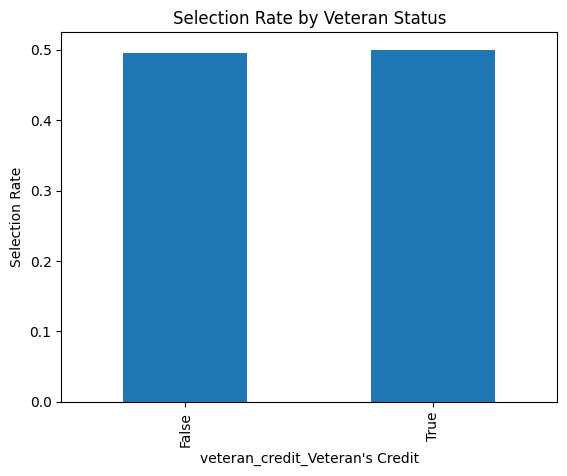

In [ ]:
# Create a MetricFrame
metric_frame = MetricFrame(metrics=selection_rate,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=X_test["veteran_credit_Veteran's Credit"])

# Plot the selection rates
metric_frame.by_group.plot.bar(
    legend=False,
    ylabel="Selection Rate",
    title="Selection Rate by Veteran Status",
)

In [ ]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate

In [ ]:
# Define base estimator
estimator = LogisticRegression(max_iter=1000)

# Train the estimator
estimator.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Apply fairness constraint: Demographic Parity
fair_model = ExponentiatedGradient(
    estimator,
    constraints=DemographicParity(),
    eps=0.01  # fairness tolerance
)

In [ ]:
# Define sensitive features for the test set
sf_test = X_test["veteran_credit_Veteran's Credit"]

# Evaluate fairness and accuracy
metric_frame = MetricFrame(
    metrics={
        "Selection Rate": selection_rate,
        "Accuracy": accuracy_score
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sf_test
)

# Print the overall and by-group metrics
print("Overall metrics:")
print(metric_frame.overall)
print("\nMetrics by group:")
print(metric_frame.by_group)
print("\nOverall Accuracy:", accuracy_score(y_test, y_pred))


Overall metrics:
Selection Rate    0.495
Accuracy          0.650
dtype: float64

Metrics by group:
                                 Selection Rate  Accuracy
veteran_credit_Veteran's Credit                          
False                                  0.494949  0.651515
True                                   0.500000  0.500000

Overall Accuracy: 0.65


Based on the analysis, the logistic regression model achieved an overall accuracy of 65%. The fairness evaluation using the MetricFrame and DemographicParity constraint shows that the selection rates for both veteran and non-veteran groups are very similar (approximately 0.495 for non-veterans and 0.500 for veterans), suggesting that the model does not exhibit significant disparity in selection rates based on veteran status. However, the accuracy for veterans is considerably lower (0.500) compared to non-veterans (0.6515), indicating potential issues with the model's performance on the veteran group.